## Анализ продаж видеоигр (поиск инсайтов, составление рекомендаций стейкхолдерам)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ВидеоИгры.xlsx')

### Постановка задачи

Необходимо исследовать данные по продаже лицензионных копий видеоигр. 

Стейкхолдерами выступает руководство компании разработчика игр. Перед компанией стоит задача по выпуску новой игры. 

Необходимо составить рекомендации для стейкхолдеров:
 - Какой регион самый активный по продажам видеоигр 
 - С какой платформы лучше начинать освоение рынка
 - Какие жанры игр являются самыми популярными 
 - Какие игры занимают верхние позиции по продажам 
 - Кто будет основными конкурентами в выбранном жанре и платформе


### Описание датасета

Для исследования используем датасет с  данными об играх, платформах, на которых они были выпущены и количестве продаж по регионам. Ниже указаны столбцы и описание их содержимого.

    Наименование - наименование игры
    Год релиза- год, в котором выпущена игра в первый раз
    Платформа - платформа, на которой выпущена игра
    Жанр - жанр игры
    Издатель - издатель игры
    NA_Sales - количество продаж в North America в миллионах штук
    EU_Sales - количество продаж в European Union в миллионах штук
    JP_Sales - количество продаж в Japan в миллионах штук
    Other_Sales - количество продаж в остальном мире в миллионах штук
    Global_Sales - количество продаж во всем мире в миллионах штук
    Оценка критиков - средняя оценка критиков
    Кол-во критиков - количество критиков, на основе которых посчитана средняя
    Оценка пользователей - средняя оценка пользователей
    Кол-во пользователей - количество пользователей, на основе которых посчитана средняя
    Разработчик - разработчик игры
    Рейтинг - рейтинг игры

Посмотрим как выглядят наши данные

In [3]:
df.head()

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
0,Wii Sports,Wii,2006.0,Спортивные игры,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Платформеры,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Гонки,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Спортивные игры,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Ролевые,Nintendo,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим сколько у нас строк и колонок, какие типы данных, сколько пропущенных значений

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Наименование          16717 non-null  object 
 1   Платформа             16719 non-null  object 
 2   Год релиза            16450 non-null  float64
 3   Жанр                  16717 non-null  object 
 4   Издатель              16665 non-null  object 
 5   NA_Sales              16719 non-null  float64
 6   EU_Sales              16719 non-null  float64
 7   JP_Sales              16719 non-null  float64
 8   Other_Sales           16719 non-null  float64
 9   Global_Sales          16719 non-null  float64
 10  Оценка критиков       8137 non-null   float64
 11  Кол-во критиков       8137 non-null   float64
 12  Оценка пользователей  10015 non-null  object 
 13  Кол-во пользователей  7590 non-null   float64
 14  Разработчик           10096 non-null  object 
 15  Рейтинг            

15 колонок и 16719 строк  
Во многих колонках есть пропущенные значения. В некоторых колонках их немного, а в некоторых даже больше половины  
В колонке "Оценка пользователей" содержатся данные типа "object", надо перевести во "float64" для возможности проведения расчетов   

Сколько пропущенных значений в каждой колонке?

In [5]:
for i in df:
    print(i, len(df.loc[df[i].isnull()]))  

Наименование 2
Платформа 0
Год релиза 269
Жанр 2
Издатель 54
NA_Sales 0
EU_Sales 0
JP_Sales 0
Other_Sales 0
Global_Sales 0
Оценка критиков 8582
Кол-во критиков 8582
Оценка пользователей 6704
Кол-во пользователей 9129
Разработчик 6623
Рейтинг 6769


Посмотрим на уникальные значения в столбце "Оценка пользователей"

In [6]:
df['Оценка пользователей'].unique()

array([8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9, 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7,
       7.3, 4.3, 7.6, 5.7, 5, 9.1, 6.5, 'tbd', 8.8, 6.9, '9', 9.4, 6.8,
       6.1, '8', 6.7, 5.4, '4', 4.9, 4.5, 9.3, 6.2, 4.2, '6', 3.7, '7',
       4.1, 5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, '5', 3.3,
       4.7, 5.1, 3.5, 2.5, 1.9, '3', 2.7, 2.2, '2', 9.5, 2.1, 3.6, 2.8,
       1.8, 3.8, '0', 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3,
       0.5, 1.3, 0.2, 0.6, 1.4, 0.9, '1', 9.7], dtype=object)

In [7]:
len(df.loc[df['Оценка пользователей'] == 'tbd'])

2425

Видим, что кроме строк с пропущенными значениями и числовыми есть так же 2425 строк, в которых указано "tbd".
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.
Вероятно это означает, что данной игре пользователь оценку ещё не поставил, можно перевести эти значения в NaN чтобы можно было считать различные показатели по столбцу

В столбцах Оценка критиков, Кол-во критиков, Оценка пользователей, Кол-во пользователей, Разработчик, Рейтинг очень много 
пропущенных значений. Пропущенные данные в числовых колонка вряд ли имеет смысл заменять средним, медийной или ещё какими-то показателями, поэтому просто не будем их учитывать

Переведем tdb в None

In [8]:
df = df.replace('tbd', np.nan)
df['Оценка пользователей'].unique()

array([8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9, 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7,
       7.3, 4.3, 7.6, 5.7, 5, 9.1, 6.5, 8.8, 6.9, '9', 9.4, 6.8, 6.1, '8',
       6.7, 5.4, '4', 4.9, 4.5, 9.3, 6.2, 4.2, '6', 3.7, '7', 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, '5', 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, '3', 2.7, 2.2, '2', 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       '0', 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3,
       0.2, 0.6, 1.4, 0.9, '1', 9.7], dtype=object)

Теперь можно заменить типы значений в столбце "Оценка пользователей" на float64 и посмотреть статистики по числовым столбцам

In [9]:
df['Оценка пользователей'] = pd.to_numeric(df['Оценка пользователей'])
df.describe()

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533229,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547885,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.700000,10665.000000


Видим, что критики ставили оценки по 100-бальной школе, а пользователи по 10-бальной. Приведем оценки пользователей к 100-бальной школе, чтобы их можно было сравнивать

In [10]:
df['Оценка пользователей'] = df['Оценка пользователей'] * 10

In [11]:
df.describe()

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533229,68.967679,26.360821,71.250461,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547885,13.938165,18.980495,15.000061,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,64.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,75.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,82.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,97.000000,10665.000000


Что видим?
- Больше всего продаж приходится на Северную Америку, на втором месте Европа, на третьем Япония
- В среднем пользователи ставять оценки немного более высокие, чем критики, но разница совсем небольшая

### Анализ

Для начала изучить наши данные подробнее. Попробуем сгруппировать данные по различным параметрам (по жанру, году релиза, издателю и т.п.) и попробуем найти какие-то инсайты

Для начала посмотрим данные по продажам в разрезе по годам 

In [12]:
df_grouped_year = df.groupby('Год релиза').sum()
df_grouped_year = df_grouped_year[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
df_grouped_year

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.68
2,1982.0,26.92,1.65,0.00,0.31,28.88
3,1983.0,7.76,0.80,8.10,0.14,16.80
4,1984.0,33.28,2.10,14.27,0.70,50.35
5,1985.0,33.73,4.74,14.56,0.92,53.95
6,1986.0,12.50,2.84,19.81,1.93,37.08
7,1987.0,8.46,1.41,11.63,0.20,21.70
8,1988.0,23.87,6.59,15.76,0.99,47.21
9,1989.0,45.15,8.44,18.36,1.50,73.45


Видим, что нету данных за 2018 и 2019 годы, а с данными за 2017 и 2020 годы явно есть какие-то проблемы, их совсем мало, посмотрим подробнее

In [13]:
df[(df['Год релиза'] == 2017) | (df['Год релиза'] == 2020)]

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
5936,Imagine: Makeup Artist,DS,2020.0,Симуляторы,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,NaN,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Ролевые,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Ролевые,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Экшен,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


За 2017 и 2020 годы есть данные только по 4 играм, поэтому не будем учитывать эти данные при анализе

In [14]:
df_grouped_year = df_grouped_year.loc[(df_grouped_year['Год релиза'] != 2017)]

In [15]:
df_grouped_year = df_grouped_year.loc[(df_grouped_year['Год релиза'] != 2020)]

In [16]:
df_grouped_year['Год релиза'].unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Убрали из датафрейма данные за 2017 и 2020 года

Сгруппируем данные по продажам по годам

In [17]:
df_grouped_year = df_grouped_year.groupby('Год релиза').sum().reset_index()
df_grouped_year

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.68
2,1982.0,26.92,1.65,0.00,0.31,28.88
3,1983.0,7.76,0.80,8.10,0.14,16.80
4,1984.0,33.28,2.10,14.27,0.70,50.35
5,1985.0,33.73,4.74,14.56,0.92,53.95
6,1986.0,12.50,2.84,19.81,1.93,37.08
7,1987.0,8.46,1.41,11.63,0.20,21.70
8,1988.0,23.87,6.59,15.76,0.99,47.21
9,1989.0,45.15,8.44,18.36,1.50,73.45


На основе оставшихся данных можем посмотреть динамику продаж по годам

Text(0, 0.5, 'Продажи, млн.')

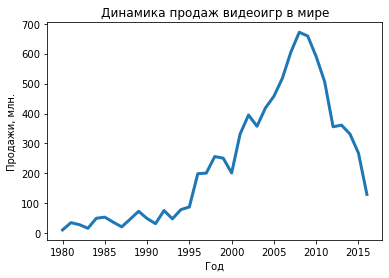

In [55]:
plt.plot(df_grouped_year['Год релиза'], df_grouped_year['Global_Sales'], linewidth=3)
plt.title('Динамика продаж видеоигр в мире')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

С 1980 по 1995 продажи постепенно росли. Начиная с 1995 года начался резкий рост продаж, вплоть до 2007-2008 годов. Поле этого началось падение продаж. Вероятно это связано с развитием интернета. Появилась возможность покупать игры онлайн, покупать электронные ключи или скачивать с различных неофициальных ресурсов бесплатно. Всё это повлияло на снижение продаж лицензионных копий. 

### Какой рынок самый активный по продажам?


In [19]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(ascending=False)

NA_Sales       4402.62
EU_Sales       2424.67
JP_Sales       1297.43
Other_Sales     791.34
dtype: float64

Суммарно за все годы больше всего продаж приходится на Северную Америку. Посмотрим динамику продаж в разрезе по годам

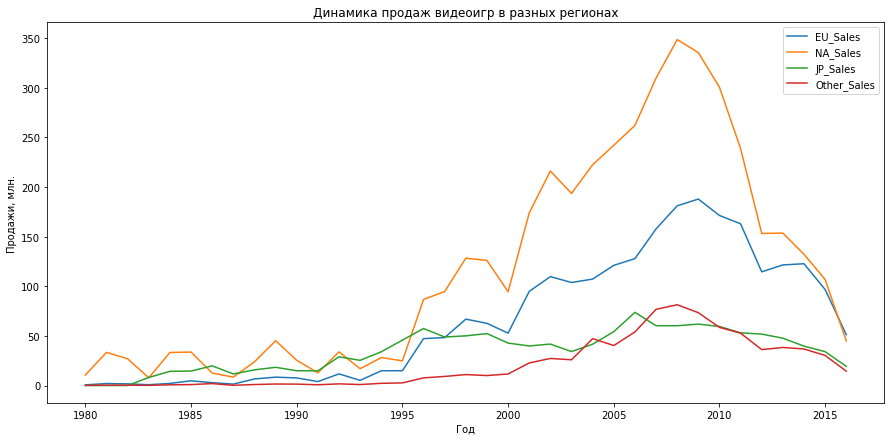

In [50]:
plt.figure(figsize=(15, 7))
plt.plot(df_grouped_year['Год релиза'], df_grouped_year['EU_Sales'], label = 'EU_Sales')
plt.plot(df_grouped_year['Год релиза'], df_grouped_year['NA_Sales'], label = 'NA_Sales')
plt.plot(df_grouped_year['Год релиза'], df_grouped_year['JP_Sales'], label = 'JP_Sales')
plt.plot(df_grouped_year['Год релиза'], df_grouped_year['Other_Sales'], label = 'Other_Sales')
plt.title('Динамика продаж видеоигр в разных регионах')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')
plt.legend()
plt.show()

Видим что в Северной Америке и Европе очень похожая динамика продаж. С 1995 начинается рост. В Северной Америке рост более активный, в Европе более умеренный. Пик продаж опять же приходится на 2007-2008 года, после чего начинается падение. 
В Японии всё немного иначе. В 1995 в Японии уровень продаж был выше, чем в остальных регионах. После этого он долгие годы держался примерно на одном уровне в отличие от Европы и Северной Америки. Рост продаж был, но довольно плавный, как и последующее падение

Для дальнейшего исследования остановимся на наиболее актуальном периоде: 2007-2009 годах.  
В более ранние периоды индустрия постоянно росла, развивалась и менялась.  
В более поздних периодах игры начали продавать не только через лицензионные копии в магазинах

Посмотрим данные по продажам в разных регионах в 2007-2009 годах

In [21]:
df_2007_2009 = df_grouped_year.loc[(df_grouped_year['Год релиза'] == 2007) | 
                                   (df_grouped_year['Год релиза'] ==2008) | 
                                   (df_grouped_year['Год релиза'] == 2009)]
df_2007_2009

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
27,2007.0,309.89,157.82,60.29,76.75,604.75
28,2008.0,348.69,181.14,60.25,81.42,671.50
29,2009.0,335.55,187.94,61.89,73.44,658.82


In [22]:
df_2007_2009[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(ascending=False)

NA_Sales       994.13
EU_Sales       526.90
Other_Sales    231.61
JP_Sales       182.43
dtype: float64

Вывод:  
Рынок Северной Америки самый активный по продажам. Поэтому ориентироваться лучше всего именно на этот рынок.

### C какой платформы стоит начинать освоение рынка?

Логично начинать с тех платформ, игры для которых больше покупают. Посмотрим какие платформые показывают лучшие результаты по продажам. Т.к. мы уже определились, что приоритетный регион для нас - это Северная Америка, то и сравнение платформ будем проводить именно в рамках этого региона.

Ориентироваться на топ платформ по уровню продаж за все годы было бы не логично, т.к. многие платформы уже устарели. Чтобы понять с какой платформы лучше начинать освоение рынка, нужно понять какие платформы самые популярные сейчас. Поэтому для иследования возьмем данные начиная с 2015 года

In [23]:
df_grouped_after_2015 = df.loc[(df['Год релиза'] >= 2015)]

In [24]:
df_grouped_platform_after_2015 = df_grouped_after_2015.groupby('Платформа').sum().sort_values(by='NA_Sales', ascending=False).reset_index()
df_grouped_platform_after_2015_top_5 = df_grouped_platform_after_2015[['Платформа', 'NA_Sales']].head(5)
df_grouped_platform_after_2015_top_5

,Платформа,NA_Sales
0,PS4,63.86
1,XOne,50.30
2,3DS,10.31
3,WiiU,8.86
4,X360,8.05


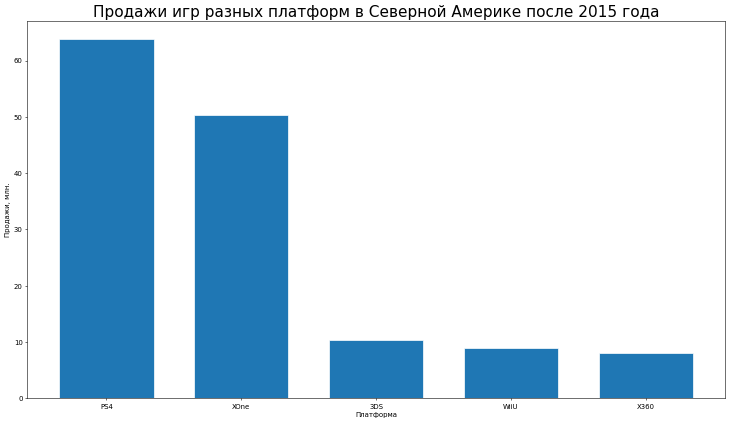

In [52]:
x = df_grouped_platform_after_2015_top_5['Платформа']
y = df_grouped_platform_after_2015_top_5['NA_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=50)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Продажи игр разных платформ в Северной Америке после 2015 года', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Платформа') 

plt.show()

Вывод:  
В Северной Америке самые популярные платформы: PS4 и XOne. Именно с этих платформ лучше всего начинать освоение рынка. Лучше с PS4, но XOne можно рассматривать, как запасной вариант. Важно учитывать, что данных по продажам за последние несколько лет очень мало, т.к. продажи лицензионных копий в магазинах сильно упали, а данных по продажам другими способами у нас нет, поэтому реальная картина может отличаться 

### Какие жанры игры являются самыми популярными?

Сгруппируем данные по жанрам и отсортируем по уровню продаж в Северной Америке

In [26]:
df_grouped_genre = df.groupby('Жанр').sum().sort_values(by='NA_Sales', ascending=False).reset_index()
df_grouped_genre = df_grouped_genre[['Жанр', 'NA_Sales']]
df_grouped_genre

,Жанр,NA_Sales
0,Экшен,879.01
1,Спортивные игры,684.43
2,Шутеры,592.24
3,Платформеры,445.50
4,Разное,407.27
5,Гонки,359.35
6,Ролевые,330.81
7,Файтинг,223.36
8,Симуляторы,182.19
9,Паззлы,122.87


Построим столбчатую диаграмму по продаже разных жанров игр

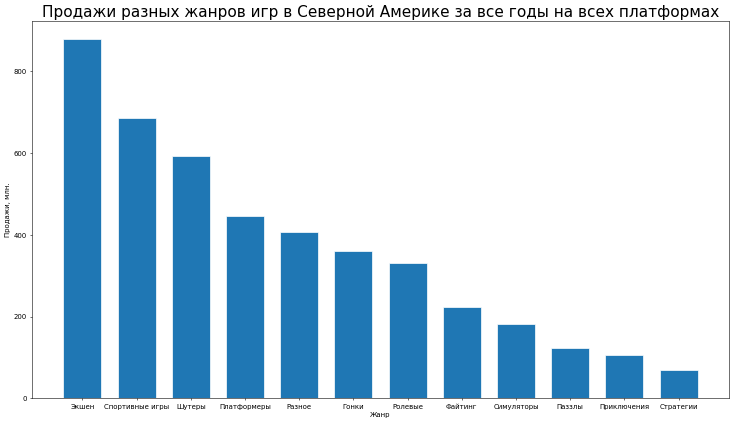

In [65]:
x = df_grouped_genre['Жанр']
y = df_grouped_genre['NA_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=50)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Продажи разных жанров игр в Северной Америке за все годы на всех платформах', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Жанр') 

plt.show()

На диаграмме видим показатели по продаже игр в мире в зависимости от жанра. Наиболее популярные жанры: экшен, спортивные иры, шутеры. Наименее популярные жанры: стратегии, приключения, паззлы. Для стейкхолдеров эта информация может быть полезна с точки зрения оценки перспективности разных жанров игр.

Так же, как и с анализом продаж, имеет смысл провести оценку по самому активному периоду: 2007-2009 годы.

In [28]:
df_genre_2007_2009 = df.loc[(df['Год релиза'] == 2007) | 
                            (df['Год релиза'] == 2008) | 
                            (df['Год релиза'] == 2009)]
df_genre_2007_2009.head()

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
2,Mario Kart Wii,Wii,2008.0,Гонки,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Спортивные игры,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Платформеры,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Спортивные игры,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,77.0,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Спортивные игры,Nintendo,9.01,8.49,2.53,1.77,21.80,80.0,33.0,74.0,52.0,Nintendo,E


In [29]:
df_grouped_genre_2007_2009 = df_genre_2007_2009.groupby('Жанр').sum().sort_values(by='NA_Sales', ascending=False).reset_index()
df_grouped_genre_2007_2009 = df_grouped_genre_2007_2009[['Жанр', 'NA_Sales']]
df_grouped_genre_2007_2009

,Жанр,NA_Sales
0,Экшен,201.53
1,Спортивные игры,167.05
2,Разное,135.36
3,Шутеры,112.64
4,Симуляторы,70.80
5,Гонки,66.57
6,Ролевые,63.36
7,Платформеры,56.24
8,Файтинг,42.82
9,Приключения,35.57


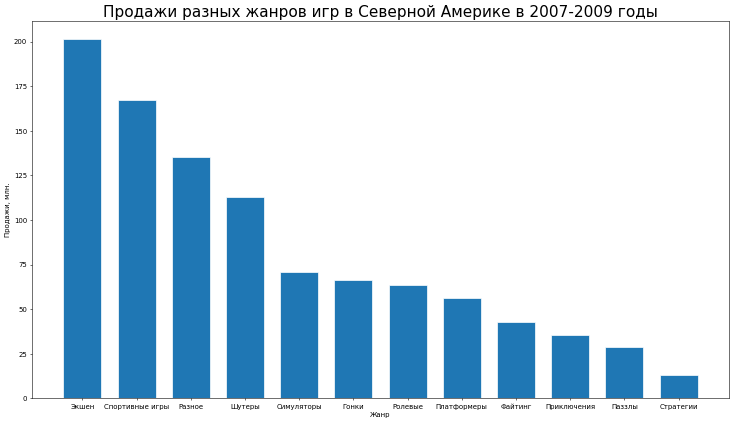

In [67]:
x = df_grouped_genre_2007_2009['Жанр']
y = df_grouped_genre_2007_2009['NA_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=50)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Продажи разных жанров игр в Северной Америке в 2007-2009 годы', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Жанр') 

plt.show()

Топ-1 и Топ-2 остались прежние: Экшен и Спортивные игры. Шутеры переехали с третьего на четвертое место в рейтинге, а на третьем месте оказалась категория "Разное"

Посмотрим самые популярные жанры на платформах PS4 и XOne

In [31]:
df_ps4 = df.loc[(df['Платформа'] == 'PS4')]
df_xone = df.loc[(df['Платформа'] == 'XOne')]

In [32]:
df_ps4_grouped_genre = df_ps4.groupby('Жанр').sum().sort_values(by='NA_Sales', ascending=False).reset_index()
df_ps4_grouped_genre = df_ps4_grouped_genre[['Жанр', 'NA_Sales']]
df_xone_grouped_genre = df_xone.groupby('Жанр').sum().sort_values(by='NA_Sales', ascending=False).reset_index()
df_xone_grouped_genre = df_xone_grouped_genre[['Жанр', 'NA_Sales']]

In [57]:
df_ps4_grouped_genre

,Жанр,NA_Sales
0,Экшен,32.83
1,Шутеры,32.66
2,Спортивные игры,19.78
3,Ролевые,9.34
4,Файтинг,3.60
5,Разное,3.14
6,Гонки,2.61
7,Платформеры,2.45
8,Приключения,1.95
9,Симуляторы,0.21


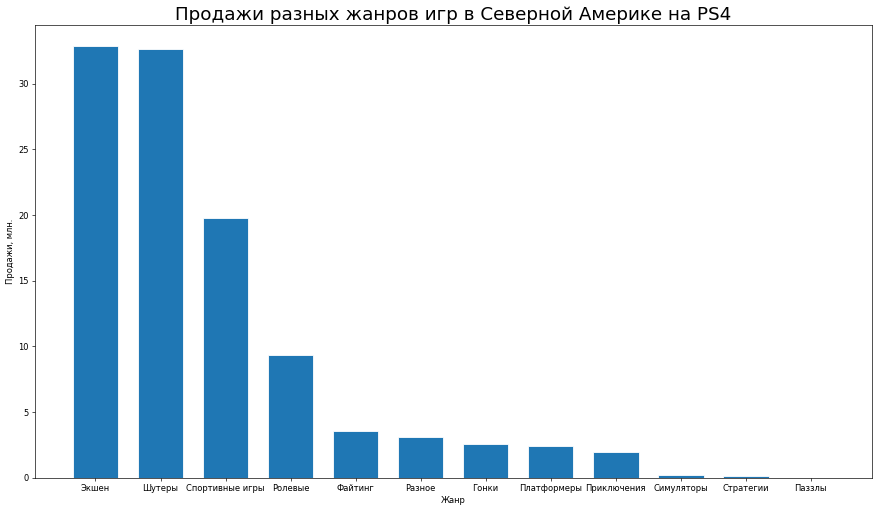

In [61]:
x = df_ps4_grouped_genre['Жанр']
y = df_ps4_grouped_genre['NA_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=60)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Продажи разных жанров игр в Северной Америке на PS4', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Жанр') 

plt.show()

Вывод:  
Самый популярный жанр игр на PS4 - Экшен. С этого жанра следует начинать. Как запасные варианты: шутеры и спортивные игры  
Самый популярный жанр игр на XOne - Шутеры. Запасные: шутеры и спортивные игры.   
Самый приоритетный вариант - экшен на PS4

В целом и в рейтинге самых продаваем жанров за все годы на всех платформах, и в рейтинге самых продаваемых жанров в 2007-2009, и в рейтинге самых продаваемых жанров на PS4 и XOne картина почти одинаковая

### Какие игры занимают верхние позиции по продажам?

Посмотрим топ-10 игр по продажам в Северной Америке в рамках самых популярных платформ PS4 и XOne и в рамках самых популярных жанров: Экшен, спортивные игры, шутеры

In [35]:
df_ps4_xone = df.loc[(df['Платформа'] == 'PS4') | (df['Платформа'] == 'XOne')]

In [36]:
df_ps4_xone_top_genres = df_ps4_xone.loc[(df_ps4_xone['Жанр'] == 'Экшен') |
                                         (df_ps4_xone['Жанр'] == 'Спортивные игры') |
                                         (df_ps4_xone['Жанр'] == 'Шутеры')]

In [37]:
df_ps4_xone_top_genres_10 = df_ps4_xone_top_genres.sort_values(by='NA_Sales', ascending=False).head(10)
df_ps4_xone_top_genres_10

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
31,Call of Duty: Black Ops 3,PS4,2015.0,Шутеры,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Шутеры,Activision,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014.0,Экшен,Take-Two Interactive,3.96,6.31,0.38,1.97,12.62,97.0,66.0,83.0,2899.0,Rockstar North,M
179,Call of Duty: Advanced Warfare,XOne,2014.0,Шутеры,Activision,3.22,1.55,0.01,0.48,5.26,81.0,53.0,54.0,898.0,Sledgehammer Games,M
87,Star Wars Battlefront (2015),PS4,2015.0,Шутеры,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN
165,Grand Theft Auto V,XOne,2014.0,Экшен,Take-Two Interactive,2.81,2.19,0.00,0.47,5.47,97.0,14.0,79.0,764.0,Rockstar North,M
92,Call of Duty: Advanced Warfare,PS4,2014.0,Шутеры,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,57.0,1443.0,Sledgehammer Games,M
242,Halo 5: Guardians,XOne,2015.0,Шутеры,Microsoft Game Studios,2.78,1.27,0.03,0.41,4.49,84.0,101.0,64.0,2438.0,343 Industries,T
413,Gears of War: Ultimate Edition,XOne,2015.0,Шутеры,Microsoft Game Studios,2.61,0.33,0.00,0.34,3.28,82.0,74.0,75.0,563.0,"Splash Damage, The Coalition",M
314,NBA 2K16,PS4,2015.0,Спортивные игры,Take-Two Interactive,2.49,0.66,0.03,0.69,3.87,87.0,51.0,67.0,364.0,Visual Concepts,E10+


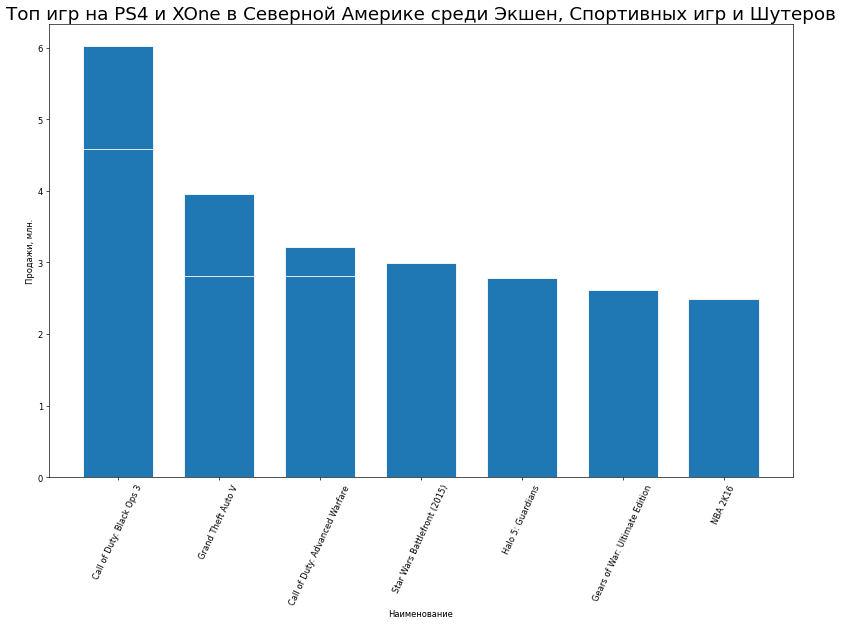

In [38]:
x = df_ps4_xone_top_genres_10['Наименование']
y = df_ps4_xone_top_genres_10['NA_Sales']

fig, ax = plt.subplots(figsize=(16,10), dpi=60)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Топ игр на PS4 и XOne в Северной Америке среди Экшен, Спортивных игр и Шутеров', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Наименование') 
plt.xticks(rotation=65)

plt.show()

Отдельно посмотрим топ самых продаваемых игр в Северной Америке в жанре Экшен на PS4

In [39]:
df_ps4 = df.loc[df['Платформа'] == 'PS4']
df_ps4_action = df_ps4.loc[df_ps4['Жанр'] == 'Экшен']
df_ps4_action_top5 = df_ps4_action.sort_values(by='NA_Sales', ascending=False).head(5)

In [40]:
df_ps4_action_top5

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
42,Grand Theft Auto V,PS4,2014.0,Экшен,Take-Two Interactive,3.96,6.31,0.38,1.97,12.62,97.0,66.0,83.0,2899.0,Rockstar North,M
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Экшен,Sony Computer Entertainment,2.07,1.71,0.08,0.76,4.62,86.0,78.0,81.0,1264.0,Bluepoint Games,T
225,The Last of Us,PS4,2014.0,Экшен,Sony Computer Entertainment,1.88,2.00,0.07,0.77,4.72,NaN,NaN,NaN,NaN,NaN,NaN
305,Batman: Arkham Knight,PS4,2015.0,Экшен,Warner Bros. Interactive Entertainment,1.53,1.69,0.10,0.64,3.96,87.0,89.0,76.0,2679.0,Rocksteady Studios,M
295,Watch Dogs,PS4,2014.0,Экшен,Ubisoft,1.40,1.90,0.11,0.64,4.05,80.0,80.0,63.0,2996.0,Ubisoft Montreal,M


In [41]:
for i, x in enumerate(df_ps4_action_top5['Наименование']):
    print(i+1, x)

1 Grand Theft Auto V
2 Uncharted: The Nathan Drake Collection
3 The Last of Us
4 Batman: Arkham Knight
5 Watch Dogs


Вывели топ-5 самых продаваемых игр в Северной Америке на PS4 в жанре экшен. На эти игры нужно равняться. Изучить их сильные и слабые стороны, преимущества и недостатки, чтобы потом использовать при разработке новой игры

### Кто будет основными конкурентами-разработчиками в выбранном жанре и консоле?

Мы определились с приоритетными регионом, платформой и жанром, а также подготовили запасные варианты.  
Напишем функцию, которая принимает в качестве аргументов платформу и жанр, а возвращает основных конкурентов

In [42]:
def competitors(platform, genre):
    """
    Передаем платформу и жанр в качестве аргументов
    Делаем датафрейм с данными только по этой платформе и жанру
    Группируем датафрейм по разработчикам
    Сортируем по уровню продаж в Северной Америке, оставляем топ-5 
    """
    df_competitor_developers = df.loc[df['Платформа'] == platform]
    df_competitor_developers = df_competitor_developers.loc[df_competitor_developers['Жанр'] == genre]
    df_competitor_developers = df_competitor_developers.groupby('Разработчик').sum().reset_index()
    df_competitor_developers = df_competitor_developers.sort_values(by='NA_Sales', ascending=False).head(5)
    
    print(f'Топ-5 разработчиков игр жанра \"{genre}\" на платформе \"{platform}\"')
    for i, x in enumerate(df_competitor_developers['Разработчик']):
        print(i+1, x)

Посмотрим топ-5 конкурентов-разработчиков в рамках нашего приоритетного варианта

In [43]:
competitors('PS4', 'Экшен')

Топ-5 разработчиков игр жанра "Экшен" на платформе "PS4"
1 Rockstar North
2 Ubisoft Montreal
3 Bluepoint Games
4 TT Games
5 Rocksteady Studios


Дополнительно можно посмотреть конкурентов по запасным вариантам и в принципе по всем остальным платформам и жанрам

In [44]:
competitors('PS4', 'Шутеры')

Топ-5 разработчиков игр жанра "Шутеры" на платформе "PS4"
1 Infinity Ward
2 Sledgehammer Games
3 Bungie Software, Bungie
4 EA DICE
5 Naughty Dog


In [45]:
competitors('PS4', 'Спортивные игры')

Топ-5 разработчиков игр жанра "Спортивные игры" на платформе "PS4"
1 EA Sports
2 Visual Concepts
3 SCEA San Diego Studios
4 Yuke's
5 EA Sports, EA Vancouver


In [46]:
competitors('XOne', 'Шутеры')

Топ-5 разработчиков игр жанра "Шутеры" на платформе "XOne"
1 343 Industries
2 Infinity Ward
3 Sledgehammer Games
4 Bungie Software, Bungie
5 Splash Damage, The Coalition


In [47]:
competitors('XOne', 'Спортивные игры')

Топ-5 разработчиков игр жанра "Спортивные игры" на платформе "XOne"
1 EA Sports
2 Visual Concepts
3 Yuke's
4 EA Sports, EA Vancouver
5 EA Canada


In [48]:
competitors('XOne', 'Экшен')

Топ-5 разработчиков игр жанра "Экшен" на платформе "XOne"
1 Rockstar North
2 Ubisoft, Ubisoft Montreal
3 TT Games
4 Ubisoft Montreal
5 Ubisoft


Определили основных конкурентов в зависимости от выбранной платформы и жанра

### Вывод

Самый активный регион по продажам видеоигр: Северная Америка.  

Освоение рынка лучше всего начинать с платформы PS4. Как запасной вариант можно ещё рассмотреть XOne. 

Самый продаваемый жанр на PS4: Экшен. Именно с этого жанра лучше всего начинать. Запасные варианты: спортивные игры и шутеры.  

Самые популярные игры в данном жанре:   
 - Grand Theft Auto V
 - Uncharted: The Nathan Drake Collection
 - The Last of Us
 - Batman: Arkham Knight
 - Watch Dogs  
На эти игры можно равняться. Стоит изучить их сильные и слабые стороны и использовать это при разработке

Основные конкуренты-разработчики:
 - Rockstar North
 - Ubisoft Montreal
 - Bluepoint Games
 - TT Games
 - Rocksteady Studios  
Эти компании делают самые большие объемы продаж в рамках выбранных региона, платформы и жанра. По возможности стоит изучить их подходы к продвижению и продаже своих игр